In [8]:
!pip install simplejson

     |████████████████████████████████| 133kB 6.9MB/s 


In [12]:
import tweepy          
import pandas as pd    
import numpy as np      
import twitter
from credentials import *   
from textblob import TextBlob
import re
from stop_words import get_stop_words
from collections import Counter
import simplejson as json
#from utils.PickleManager import *stop_words = get_stop_words('en')
#import os from django_setup.settings import compressFileDir,twitterFileDir

In [13]:
def userAuthentication():
    auth = tweepy.OAuthHandler('O7BKFNsZxT6o2faDsIoQSIAgl', 'u4W6cqXkngniTBC6GUUUN0bxfGog6Zo5j2G4JaNOlyJecUHB4s')
    auth.set_access_token('154894359-VoYFfUuUBKxquxrLpURALnLCNe5fU9ZFNwXSW5dm', 'Ic3ywx9OXefHFIyIWFlmpvXfckaaCbAFPvC2l37FoXvbU')
    twitter_api = tweepy.API(auth)
    return twitter_api
twitter_api = userAuthentication()

query = "@WHO"
msgs=[]
tQryData =  tweepy.Cursor(twitter_api.search, q=query).items(int(500))
for tweet in tQryData:
    msg = [tweet.text,len(tweet.text),tweet.id,tweet.favorite_count,tweet.retweet_count,tweet.source, tweet.source_url,tweet.created_at,tweet.user.profile_image_url,tweet.user.name,tweet.user.screen_name,tweet.geo,tweet.user.location,tweet.entities.get('hashtags')]
    msg = tuple(msg)
    msgs.append(msg)

df = pd.DataFrame(msgs)
df.columns = ['tweets','text_length','id','likes','retweets', 'source', 'url','created_at','image_url','author_name','author_screen_name','geo','location','hashtags']







In [14]:
df

,tweets,text_length,id,likes,retweets,source,url,created_at,image_url,author_name,author_screen_name,geo,location,hashtags
0,RT @Smsm_Salah_: #الصيادله_غاضبون\n#الوزيره_فو...,140,1389180163808796674,0,27,Twitter Web App,https://mobile.twitter.com,2021-05-03 11:28:55,http://pbs.twimg.com/profile_images/1157435187...,Hend Elkady,HendElkady14,None,,"[{'text': 'الصيادله_غاضبون', 'indices': [17, 3..."
1,At last:- #COVIDisAirborne according to the la...,140,1389180162969722880,1,0,Twitter for iPhone,http://twitter.com/download/iphone,2021-05-03 11:28:55,http://pbs.twimg.com/profile_images/1374715582...,chugalkhor qala,tania_maheen,None,Jeddah,"[{'text': 'COVIDisAirborne', 'indices': [10, 2..."
2,RT @official_aimsa: pendamic situation going w...,140,1389180156061782020,0,58,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:28:53,http://abs.twimg.com/sticky/default_profile_im...,uday raut,udayrau99156356,None,,[]
3,RT @srinivasiyc: @FMamundzay @sidhant @IamNave...,140,1389180154006626305,0,45,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:28:53,http://abs.twimg.com/sticky/default_profile_im...,leejas,ahadsajeel,None,,[]
4,"RT @AmgadMedhat7: Hala Zayed, The Minister of ...",140,1389180152140247041,0,33,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:28:52,http://pbs.twimg.com/profile_images/1387676575...,esraa ali,esraaal58978415,None,,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RT @srinivasiyc: @FMamundzay @sidhant @IamNave...,140,1389177234456383488,0,45,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:17,http://pbs.twimg.com/profile_images/1385849850...,Hamza امیر حمزه,hamza27041988,None,"Delhi, India",[]
496,RT @AsmaaAm84263966: #الصيادله_غاضبون\n#الوزير...,140,1389177233835757569,0,7,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:16,http://pbs.twimg.com/profile_images/1385154033...,Asmaa,Asmaa49571539,None,Egypt,"[{'text': 'الصيادله_غاضبون', 'indices': [21, 3..."
497,RT @srinivasiyc: @FMamundzay @sidhant @IamNave...,140,1389177230249525250,0,45,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:16,http://pbs.twimg.com/profile_images/1348714780...,kaushal,kaushalk9,None,"New Delhi, India",[]
498,@DSSNewsUpdates @derasachasauda @Gurmeetramrah...,85,1389177216383143936,0,0,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:12,http://pbs.twimg.com/profile_images/9097070525...,Anil Bukkal,BukkalAnil,None,,[]


In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords 

In [17]:
from nltk.stem.porter import PorterStemmer

In [18]:
df["tweets"]=df["tweets"].astype(str)

In [19]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:

df["Tweets_clean"] = df["tweets"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["tweets"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1),df['sentiments'].apply(pd.Series)], axis=1)


In [34]:
df

,tweets,text_length,id,likes,retweets,source,url,created_at,image_url,author_name,author_screen_name,geo,location,hashtags,Tweets_clean,neg,neu,pos,compound
0,RT @Smsm_Salah_: #الصيادله_غاضبون\n#الوزيره_فو...,140,1389180163808796674,0,27,Twitter Web App,https://mobile.twitter.com,2021-05-03 11:28:55,http://pbs.twimg.com/profile_images/1157435187...,Hend Elkady,HendElkady14,None,,"[{'text': 'الصيادله_غاضبون', 'indices': [17, 3...",rt smsm_salah الصيادله_غاضبون\n#الوزيره_فوق_ال...,0.000,0.862,0.138,0.3724
1,At last:- #COVIDisAirborne according to the la...,140,1389180162969722880,1,0,Twitter for iPhone,http://twitter.com/download/iphone,2021-05-03 11:28:55,http://pbs.twimg.com/profile_images/1374715582...,chugalkhor qala,tania_maheen,None,Jeddah,"[{'text': 'COVIDisAirborne', 'indices': [10, 2...",last covidisairborne accord late statement rep...,0.000,1.000,0.000,0.0000
2,RT @official_aimsa: pendamic situation going w...,140,1389180156061782020,0,58,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:28:53,http://abs.twimg.com/sticky/default_profile_im...,uday raut,udayrau99156356,None,,[],rt official_aimsa pendamic situation go bad da...,0.194,0.806,0.000,-0.6249
3,RT @srinivasiyc: @FMamundzay @sidhant @IamNave...,140,1389180154006626305,0,45,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:28:53,http://abs.twimg.com/sticky/default_profile_im...,leejas,ahadsajeel,None,,[],rt srinivasiyc fmamundzay sidhant iamnaveenkap...,0.000,1.000,0.000,0.0000
4,"RT @AmgadMedhat7: Hala Zayed, The Minister of ...",140,1389180152140247041,0,33,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:28:52,http://pbs.twimg.com/profile_images/1387676575...,esraa ali,esraaal58978415,None,,[],rt hala zayed minister health break constituti...,0.177,0.823,0.000,-0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RT @srinivasiyc: @FMamundzay @sidhant @IamNave...,140,1389177234456383488,0,45,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:17,http://pbs.twimg.com/profile_images/1385849850...,Hamza امیر حمزه,hamza27041988,None,"Delhi, India",[],rt srinivasiyc fmamundzay sidhant iamnaveenkap...,0.000,1.000,0.000,0.0000
496,RT @AsmaaAm84263966: #الصيادله_غاضبون\n#الوزير...,140,1389177233835757569,0,7,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:16,http://pbs.twimg.com/profile_images/1385154033...,Asmaa,Asmaa49571539,None,Egypt,"[{'text': 'الصيادله_غاضبون', 'indices': [21, 3...",rt الصيادله_غاضبون\n#الوزيره_فوق_القانون\n#الص...,0.000,1.000,0.000,0.0000
497,RT @srinivasiyc: @FMamundzay @sidhant @IamNave...,140,1389177230249525250,0,45,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:16,http://pbs.twimg.com/profile_images/1348714780...,kaushal,kaushalk9,None,"New Delhi, India",[],rt srinivasiyc fmamundzay sidhant iamnaveenkap...,0.000,1.000,0.000,0.0000
498,@DSSNewsUpdates @derasachasauda @Gurmeetramrah...,85,1389177216383143936,0,0,Twitter for Android,http://twitter.com/download/android,2021-05-03 11:17:12,http://pbs.twimg.com/profile_images/9097070525...,Anil Bukkal,BukkalAnil,None,,[],dssnewsupdates derasachasauda gurmeetramrahim ...,0.000,0.631,0.369,0.6249


In [35]:
df.groupby('Useful Complains/Not Useful Complains')['neg'].count()

KeyError: ignored

In [36]:

# add number of characters column
df["nb_chars"] = df["tweets"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["tweets"].apply(lambda x: len(x.split(" ")))

In [37]:
pip install gensim

In [38]:
import gensim

In [40]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Tweets_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Tweets_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [41]:
df.columns

Index(['tweets', 'text_length', 'id', 'likes', 'retweets', 'source', 'url',
       'created_at', 'image_url', 'author_name', 'author_screen_name', 'geo',
       'location', 'hashtags', 'Tweets_clean', 'neg', 'neu', 'pos', 'compound',
       'nb_chars', 'nb_words', 'doc2vec_vector_0', 'doc2vec_vector_1',
       'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4'],
      dtype='object')

In [ ]:
df2=df1[df1['Useful Complains/Not Useful Complains']==1]

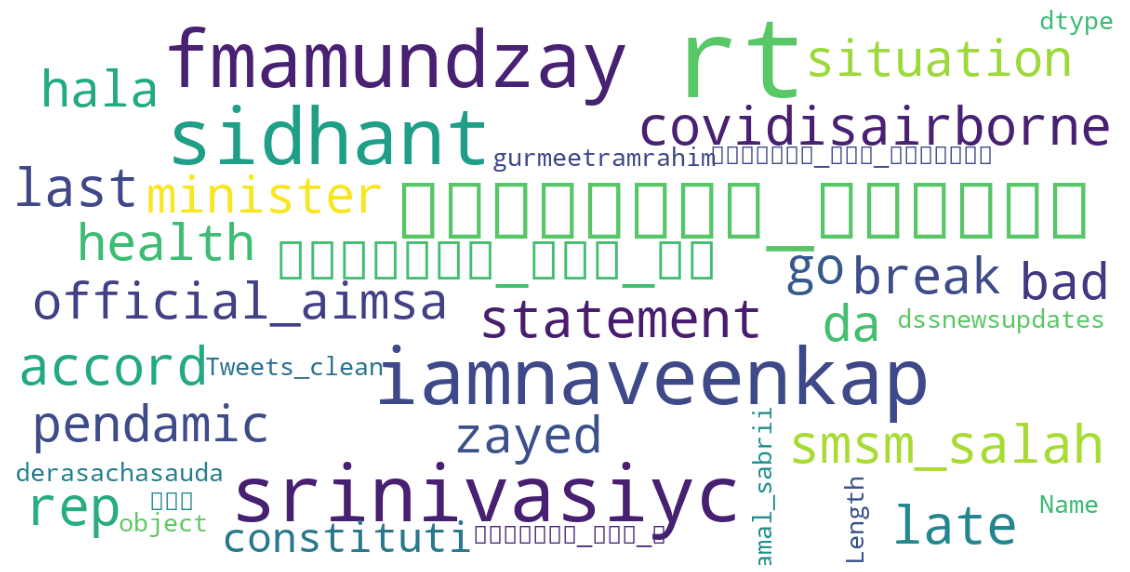

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Tweets_clean"])
#view raw

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Tweets_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

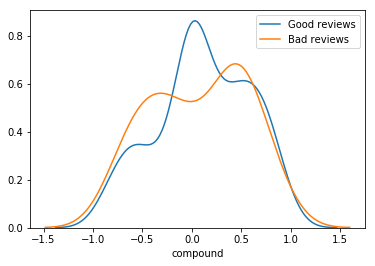

In [ ]:

# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df1[df1[ 'Useful Complains/Not Useful Complains'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [ ]:
df1.columns

Index(['Tweets', 'Useful Complains/Not Useful Complains', 'Useful/Useless',
       'Tweets_clean', 'neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words',
       'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2',
       'doc2vec_vector_3', 'doc2vec_vector_4', 'word_arron_banks',
       'word_change', 'word_claireperrymp', 'word_climate', 'word_eu',
       'word_get', 'word_https', 'word_leave', 'word_like', 'word_markfielduk',
       'word_michaelgove', 'word_one', 'word_rt', 'word_set', 'word_think',
       'word_uk', 'word_would'],
      dtype='object')

In [ ]:
df1["Useful Complains/Not Useful Complains"]=df1["Useful Complains/Not Useful Complains"].astype(str)
df1["Useful/Useless"]=df1["Useful/Useless"].astype(int)

In [ ]:
label = "Useful Complains/Not Useful Complains"
ignore_cols = [label, "Tweets", "Tweets_clean","Useful/Useless  "]
features = [c for c in df1.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[label], test_size = 0.40, random_state = 42)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
0,Useful/Useless,0.111176
5,nb_chars,0.106677
6,nb_words,0.086258
9,doc2vec_vector_2,0.078247
7,doc2vec_vector_0,0.069710
1,neg,0.067374
8,doc2vec_vector_1,0.063925
11,doc2vec_vector_4,0.055715
4,compound,0.047725
2,neu,0.047676


In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [ ]:
import xgboost as xgb

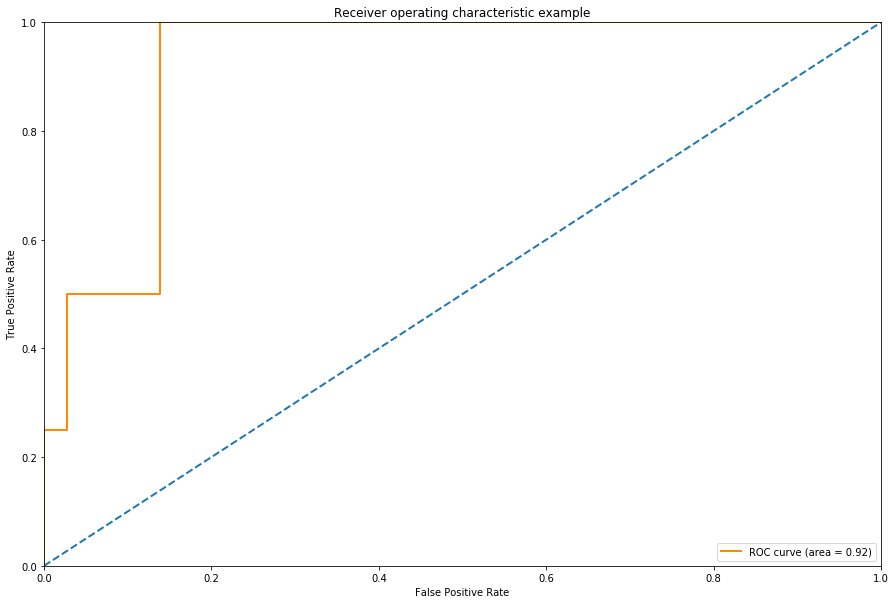

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df1.shape

(199, 32)

In [6]:
import pandas as pd

In [7]:
tweet_train=pd.read_csv("https://raw.githubusercontent.com/maitri23/major_proj/main/Data/train_tweets.csv")

In [8]:
tweets = tweet_train.tweet.values
labels = tweet_train.label.values

Now, we will initialize the BERT tokenizer and convert each word to a unique token. Here we use a method called encode which helps in combining multiple steps. The method splits the sentences to tokens, adds the [cls] and [sep] tokens and also matches the tokens to id.

In [9]:
!pip install transformers

In [10]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tweetid = []
for tweet in tweets:
  encoded_tweet = tokenizer.encode(tweet,add_special_tokens = True,)
  tweetid.append(encoded_tweet)

print('Original: ', tweets[0])
print('Token IDs:', tweetid[0])

Original:   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Token IDs: [101, 1030, 5310, 2043, 1037, 2269, 2003, 28466, 2389, 1998, 2003, 2061, 14337, 2002, 8011, 2015, 2010, 4268, 2046, 2010, 28466, 1012, 1001, 2448, 102]


Next, we will truncate the sentences so that all the sentences have the same length. 

In [11]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 64

print('\n Truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

tweetid = pad_sequences(tweetid, maxlen=MAX_LEN, dtype="long", 

                          value=0, truncating="post", padding="post")



 Truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0


In [12]:
masks = []
for tweet in tweetid:
  mask = [int(token_id > 0) for token_id in tweet]
  masks.append(mask)

In [13]:
from sklearn.model_selection import train_test_split

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(tweetid, labels, random_state=2018, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(masks, labels, random_state=2018, test_size=0.1)

In [14]:
import torch

if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
else:
    print('Using CPU.')
    device = torch.device("cpu")

There are 1 GPU(s) available.


In [15]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [16]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2, 
    output_attentions = False, 
    output_hidden_states = False, 
)

model.cuda()
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

from transformers import get_linear_schedule_with_warmup

epochs = 4

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [19]:
def accuracy(preds, labels):
    pred = np.argmax(preds, axis=1).flatten()
    labels = labels.flatten()
    return np.sum(pred == labels) / len(labels)

import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []
for epoch_i in range(0, epochs):
  print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
  total_loss = 0
  model.train()
  for step, batch in enumerate(train_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}. '.format(step, len(train_dataloader)))
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()        

    outputs = model(b_input_ids, 
                token_type_ids=None, 
                attention_mask=b_input_mask, 
                labels=b_labels)

    loss = outputs[0]    
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("validation")

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():        
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))

Streaming output truncated to the last 5000 lines.
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Average training loss: 0.01
validation
  Aver

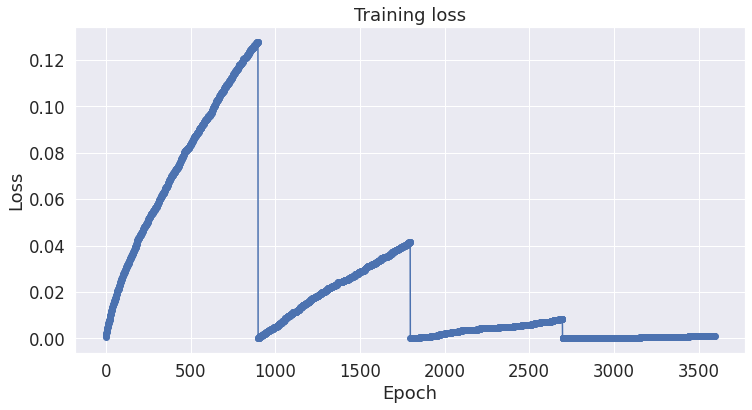

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()